
##**Dominance of Artificial Intelligence and Machine Learning Algorithms in Real-time raffic Flow Prediction and Route Optimization in Autonomous Vehicles**


In [1]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [16]:
!cp '/content/drive/MyDrive/Traffic_route_prediction (1) (1).ipynb'* /content/Autonomous-Car-Traffic-Prediction

In [17]:
%cd /content/Autonomous-Car-Traffic-Prediction/


/content/Autonomous-Car-Traffic-Prediction


In [18]:
!git add .


In [19]:
!git commit -m "Add files from Google Colab"


[main a38b6bb] Add files from Google Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Traffic_route_prediction (1) (1).ipynb (72%)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import requests


##**Data Collection**

In [ ]:


# Specify the start and end dates for recent years
start_date = "2020-01-01T00:00:00"
end_date = "2021-12-31T23:59:59"

# URL with date range filtering
url = f"https://data.cityofnewyork.us/resource/btm5-ppia.json?$where=date >= '{start_date}' AND date <= '{end_date}'"

# Making a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Converting the JSON response to a DataFrame
    sensor_data = pd.DataFrame(response.json())
    # Display the first few rows
    print(sensor_data.head())
else:
    print(f"Failed to retrieve data: {response.status_code} - {response.text}")


    id segmentid    roadway_name                      from  \
0  100      8152  BRIELLE AVENUE            Suffolk Avenue   
1  100      8152  BRIELLE AVENUE            Suffolk Avenue   
2  102    147673        BROADWAY  Van Cortlandt Park South   
3  102    255653        BROADWAY   Broadway/ 7 Avenue Line   
4  102    158447        BROADWAY         West 242nd Street   

                         to direction                     date _12_00_1_00_am  \
0         Livingston Avenue        EB  2020-10-03T00:00:00.000             19   
1         Livingston Avenue        WB  2020-10-03T00:00:00.000             29   
2         West 242nd Street        SB  2020-10-03T00:00:00.000            120   
3   Broadway/ 7 Avenue Line        SB  2020-10-03T00:00:00.000             48   
4  Van Cortlandt Park South        NB  2020-10-03T00:00:00.000            189   

  _1_00_2_00am _2_00_3_00am  ... _2_00_3_00pm _3_00_4_00pm _4_00_5_00pm  \
0           33           30  ...          145          163       

In [ ]:
#checking the datatypes in the dataset
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1000 non-null   object
 1   segmentid       1000 non-null   object
 2   roadway_name    1000 non-null   object
 3   from            1000 non-null   object
 4   to              1000 non-null   object
 5   direction       1000 non-null   object
 6   date            1000 non-null   object
 7   _12_00_1_00_am  1000 non-null   object
 8   _1_00_2_00am    1000 non-null   object
 9   _2_00_3_00am    1000 non-null   object
 10  _3_00_4_00am    1000 non-null   object
 11  _4_00_5_00am    1000 non-null   object
 12  _5_00_6_00am    1000 non-null   object
 13  _6_00_7_00am    1000 non-null   object
 14  _7_00_8_00am    1000 non-null   object
 15  _8_00_9_00am    1000 non-null   object
 16  _9_00_10_00am   1000 non-null   object
 17  _10_00_11_00am  1000 non-null   object
 18  _11_00_12

In [ ]:
#checking the columns and rows in the data
sensor_data.shape

(1000, 31)

In [ ]:
Python#checking the first 5 data
sensor_data.head(5)

,id,segmentid,roadway_name,from,to,direction,date,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
0,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,EB,2020-10-03T00:00:00.000,19,33,30,...,145,163,136,123,133,119,80,56,40,29
1,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,WB,2020-10-03T00:00:00.000,29,9,10,...,332,289,189,121,92,80,63,39,57,30
2,102,147673,BROADWAY,Van Cortlandt Park South,West 242nd Street,SB,2020-10-03T00:00:00.000,120,102,56,...,423,451,434,413,426,347,268,211,199,166
3,102,255653,BROADWAY,Broadway/ 7 Avenue Line,Broadway/ 7 Avenue Line,SB,2020-10-03T00:00:00.000,48,50,28,...,176,153,165,127,140,103,97,80,69,64
4,102,158447,BROADWAY,West 242nd Street,Van Cortlandt Park South,NB,2020-10-03T00:00:00.000,189,146,100,...,693,701,662,604,551,485,442,342,293,269


#**Data Cleaning**

In [ ]:
#checking for null values
sensor_data.isnull().sum()

,0
id,0
segmentid,0
roadway_name,0
from,0
to,0
direction,0
date,0
_12_00_1_00_am,0
_1_00_2_00am,0
_2_00_3_00am,0


In [ ]:
sensor_data.isnull().any()

,0
id,False
segmentid,False
roadway_name,False
from,False
to,False
direction,False
date,False
_12_00_1_00_am,False
_1_00_2_00am,False
_2_00_3_00am,False


In [ ]:
#checking for duplicates
sensor_data.duplicated().sum()

0

In [ ]:
sensor_data.columns[7:]

Index(['_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')

In [ ]:

# List of time columns to convert to numeric
numeric_colmns = [
    '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'
]

# Convert each of the time columns to numeric, coercing errors to NaN
for column in numeric_colmns:
    sensor_data[column] = pd.to_numeric(sensor_data[column], errors='coerce')

# Verify the conversion by checking the data types
print(sensor_data.dtypes)

# Display the first few rows to ensure the conversion is successful
#print(sensor_data.head())

id                object
segmentid         object
roadway_name      object
from              object
to                object
direction         object
date              object
_12_00_1_00_am     int64
_1_00_2_00am       int64
_2_00_3_00am       int64
_3_00_4_00am       int64
_4_00_5_00am       int64
_5_00_6_00am       int64
_6_00_7_00am       int64
_7_00_8_00am       int64
_8_00_9_00am       int64
_9_00_10_00am      int64
_10_00_11_00am     int64
_11_00_12_00pm     int64
_12_00_1_00pm      int64
_1_00_2_00pm       int64
_2_00_3_00pm       int64
_3_00_4_00pm       int64
_4_00_5_00pm       int64
_5_00_6_00pm       int64
_6_00_7_00pm       int64
_7_00_8_00pm       int64
_8_00_9_00pm       int64
_9_00_10_00pm      int64
_10_00_11_00pm     int64
_11_00_12_00am     int64
dtype: object


In [ ]:
sensor_data[column].head()

,_11_00_12_00am
0,29
1,30
2,166
3,64
4,269


In [ ]:
sensor_data.isnull().any()

,0
id,False
segmentid,False
roadway_name,False
from,False
to,False
direction,False
date,False
_12_00_1_00_am,False
_1_00_2_00am,False
_2_00_3_00am,False


In [ ]:
sensor_data.head()

,id,segmentid,roadway_name,from,to,direction,date,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
0,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,EB,2020-10-03T00:00:00.000,19,33,30,...,145,163,136,123,133,119,80,56,40,29
1,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,WB,2020-10-03T00:00:00.000,29,9,10,...,332,289,189,121,92,80,63,39,57,30
2,102,147673,BROADWAY,Van Cortlandt Park South,West 242nd Street,SB,2020-10-03T00:00:00.000,120,102,56,...,423,451,434,413,426,347,268,211,199,166
3,102,255653,BROADWAY,Broadway/ 7 Avenue Line,Broadway/ 7 Avenue Line,SB,2020-10-03T00:00:00.000,48,50,28,...,176,153,165,127,140,103,97,80,69,64
4,102,158447,BROADWAY,West 242nd Street,Van Cortlandt Park South,NB,2020-10-03T00:00:00.000,189,146,100,...,693,701,662,604,551,485,442,342,293,269


In [ ]:
sensor_data.columns[6:]

Index(['date', '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am',
       '_3_00_4_00am', '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am',
       '_7_00_8_00am', '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am',
       '_11_00_12_00pm', '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm',
       '_3_00_4_00pm', '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm',
       '_7_00_8_00pm', '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm',
       '_11_00_12_00am'],
      dtype='object')

In [ ]:
# Check if 'date' column exists in the DataFrame
if 'date' in sensor_data.columns:
    #convert date to datetime
    #set it as index
    sensor_data['date']=pd.to_datetime(sensor_data['date'])
    sensor_data.set_index('date',inplace=True)
else:
    print("Error: 'date' column not found in the DataFrame. Please check your data.")

In [ ]:
sensor_data.head()

,id,segmentid,roadway_name,from,to,direction,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,_3_00_4_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,EB,19,33,30,7,...,145,163,136,123,133,119,80,56,40,29
2020-10-03,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,WB,29,9,10,12,...,332,289,189,121,92,80,63,39,57,30
2020-10-03,102,147673,BROADWAY,Van Cortlandt Park South,West 242nd Street,SB,120,102,56,56,...,423,451,434,413,426,347,268,211,199,166
2020-10-03,102,255653,BROADWAY,Broadway/ 7 Avenue Line,Broadway/ 7 Avenue Line,SB,48,50,28,20,...,176,153,165,127,140,103,97,80,69,64
2020-10-03,102,158447,BROADWAY,West 242nd Street,Van Cortlandt Park South,NB,189,146,100,74,...,693,701,662,604,551,485,442,342,293,269


#**Exploratory Data Analysis**

In [ ]:
#get the the summary startistcs
sensor_data.describe()

,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,_3_00_4_00am,_4_00_5_00am,_5_00_6_00am,_6_00_7_00am,_7_00_8_00am,_8_00_9_00am,_9_00_10_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,143.278000,99.187000,73.359000,60.823000,62.90000,95.61900,169.030000,248.489000,289.09600,306.527000,...,477.440000,487.249000,476.377000,466.162000,432.064000,381.003000,312.687000,251.502000,211.910000,180.15300
std,137.911894,100.249139,78.499569,64.497377,67.15859,112.47795,193.248514,261.162823,262.94634,256.822466,...,394.828279,399.032753,385.225458,381.231073,356.950691,318.432194,263.005374,216.484049,188.530824,171.34428
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,54.000000,35.000000,23.000000,19.000000,22.00000,32.00000,54.000000,89.000000,116.00000,136.750000,...,226.000000,235.000000,228.000000,223.750000,204.750000,176.000000,142.750000,109.000000,88.000000,70.00000
50%,104.500000,69.000000,49.500000,41.000000,41.00000,61.00000,108.000000,169.000000,209.50000,239.000000,...,377.000000,395.000000,384.000000,371.500000,340.000000,294.000000,238.000000,188.500000,158.500000,130.00000
75%,179.250000,126.250000,92.000000,77.000000,81.25000,119.00000,216.000000,321.500000,389.25000,406.000000,...,577.250000,601.250000,594.750000,584.500000,536.000000,477.000000,390.000000,320.000000,269.000000,228.00000
max,1041.000000,778.000000,607.000000,605.000000,571.00000,1158.00000,1526.000000,2289.000000,1953.00000,1567.000000,...,2435.000000,2479.000000,2569.000000,2559.000000,2323.000000,2173.000000,1787.000000,1520.000000,1256.000000,1196.00000


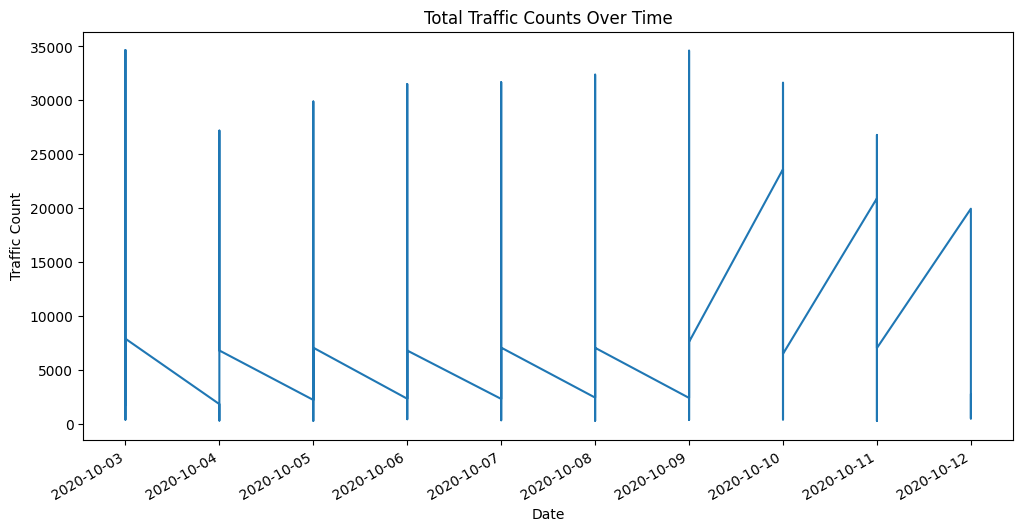

In [ ]:
#Visualize the distribution of traffic counts over time
plt.figure(figsize=(12, 6))
sensor_data[numeric_colmns].sum(axis=1).plot()
plt.title('Total Traffic Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.show()

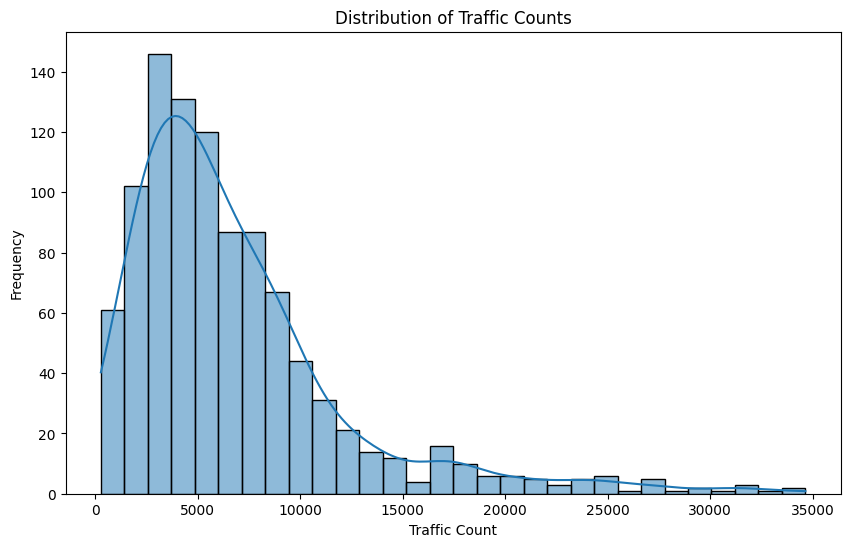

In [ ]:
#know the ditribution of the data
plt.figure(figsize=(10, 6))
sns.histplot(sensor_data[numeric_colmns].sum(axis=1), bins=30, kde=True)
plt.title('Distribution of Traffic Counts')
plt.xlabel('Traffic Count')
plt.ylabel('Frequency')
plt.show()

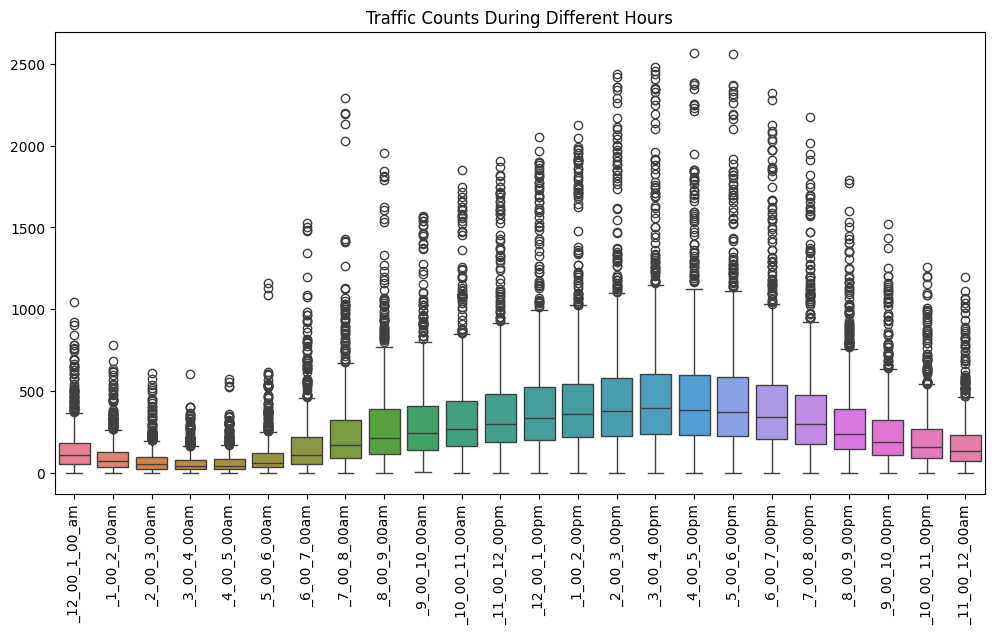

In [ ]:
# Step 2: Analyze traffic counts during different times of the day
plt.figure(figsize=(12, 6))
sns.boxplot(data=sensor_data[numeric_colmns])
plt.xticks(rotation=90)
plt.title('Traffic Counts During Different Hours')
plt.show()

In [ ]:
#dealing with outliers

def replace_outliers_with_median(sensor_data, numeric_colmns):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = sensor_data[numeric_colmns].quantile(0.25)
    Q3 = sensor_data[numeric_colmns].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the outlier threshold
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median_value = sensor_data[numeric_colmns].median()
    sensor_data[numeric_colmns] = np.where((sensor_data[numeric_colmns] < lower_bound) | (sensor_data[numeric_colmns] > upper_bound), median_value, sensor_data[numeric_colmns])

    return sensor_data

# Apply the function to all hourly traffic count columns
hourly_columns = sensor_data[numeric_colmns][6:]
for column in hourly_columns:
    sensor_data = replace_outliers_with_median(sensor_data, numeric_colmns)

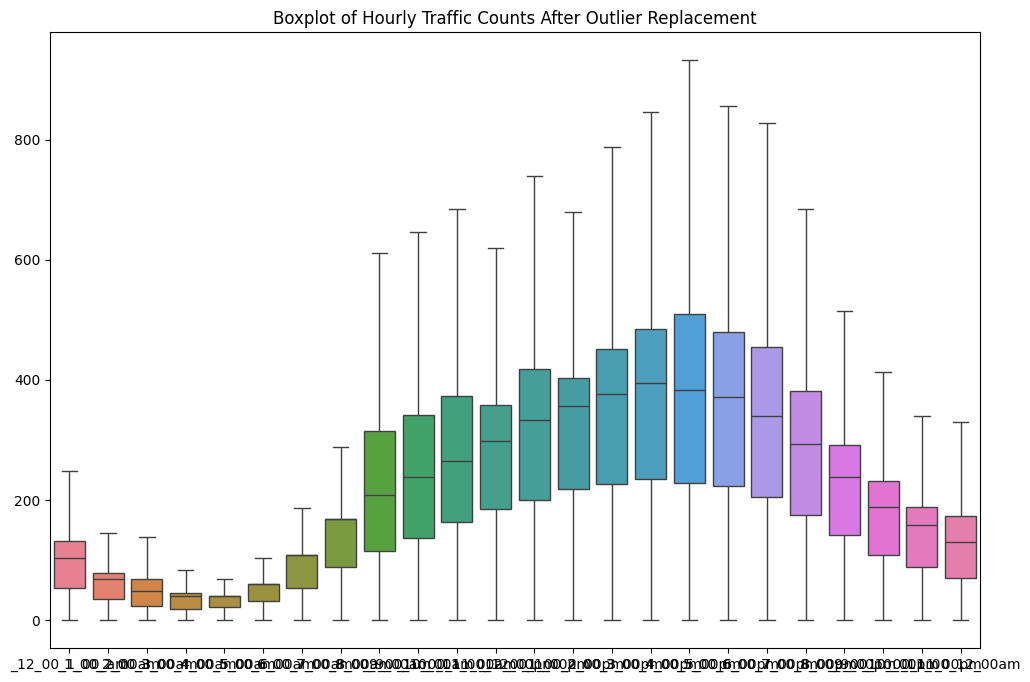

In [ ]:
# Plot boxplots to see if outliers have been reduced
plt.figure(figsize=(12, 8))
sns.boxplot(data=sensor_data[numeric_colmns])
plt.title("Boxplot of Hourly Traffic Counts After Outlier Replacement")
plt.show()

In [ ]:
data=sensor_data[numeric_colmns].corr()
data

,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,_3_00_4_00am,_4_00_5_00am,_5_00_6_00am,_6_00_7_00am,_7_00_8_00am,_8_00_9_00am,_9_00_10_00am,...,_2_00_3_00pm,_3_00_4_00pm,_4_00_5_00pm,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am
_12_00_1_00_am,1.000000,0.825404,0.819516,0.754089,0.682179,0.538504,0.467248,0.428344,0.362366,0.452389,...,0.567455,0.527768,0.523950,0.531489,0.554792,0.622158,0.705150,0.725249,0.769173,0.745415
_1_00_2_00am,0.825404,1.000000,0.814164,0.781616,0.703440,0.483508,0.379754,0.349486,0.271898,0.377821,...,0.481378,0.448720,0.440042,0.440823,0.473212,0.541616,0.612945,0.647634,0.668806,0.649998
_2_00_3_00am,0.819516,0.814164,1.000000,0.758341,0.665808,0.505505,0.405116,0.362969,0.267289,0.360950,...,0.476861,0.442534,0.424743,0.428986,0.466377,0.531766,0.603582,0.632259,0.670997,0.655141
_3_00_4_00am,0.754089,0.781616,0.758341,1.000000,0.766653,0.541183,0.449945,0.414098,0.390373,0.474710,...,0.541534,0.535516,0.526806,0.521565,0.547544,0.604745,0.657964,0.678879,0.696095,0.680953
_4_00_5_00am,0.682179,0.703440,0.665808,0.766653,1.000000,0.715111,0.615791,0.564627,0.515441,0.543665,...,0.600751,0.608193,0.592987,0.598598,0.603587,0.628227,0.666549,0.663395,0.694941,0.649693
_5_00_6_00am,0.538504,0.483508,0.505505,0.541183,0.715111,1.000000,0.795184,0.724097,0.615296,0.594553,...,0.640404,0.648043,0.631676,0.647791,0.637730,0.635282,0.647864,0.628920,0.636953,0.603857
_6_00_7_00am,0.467248,0.379754,0.405116,0.449945,0.615791,0.795184,1.000000,0.877299,0.667642,0.669185,...,0.665144,0.670320,0.654851,0.667288,0.660477,0.648491,0.630337,0.590480,0.598837,0.579509
_7_00_8_00am,0.428344,0.349486,0.362969,0.414098,0.564627,0.724097,0.877299,1.000000,0.695420,0.694612,...,0.688655,0.685418,0.668046,0.692045,0.672669,0.649824,0.602085,0.562527,0.561194,0.551514
_8_00_9_00am,0.362366,0.271898,0.267289,0.390373,0.515441,0.615296,0.667642,0.695420,1.000000,0.863261,...,0.709094,0.741744,0.769638,0.755734,0.729031,0.682955,0.593794,0.547030,0.519789,0.495316
_9_00_10_00am,0.452389,0.377821,0.360950,0.474710,0.543665,0.594553,0.669185,0.694612,0.863261,1.000000,...,0.782060,0.801314,0.828408,0.796803,0.800526,0.751257,0.669745,0.654436,0.622115,0.571680


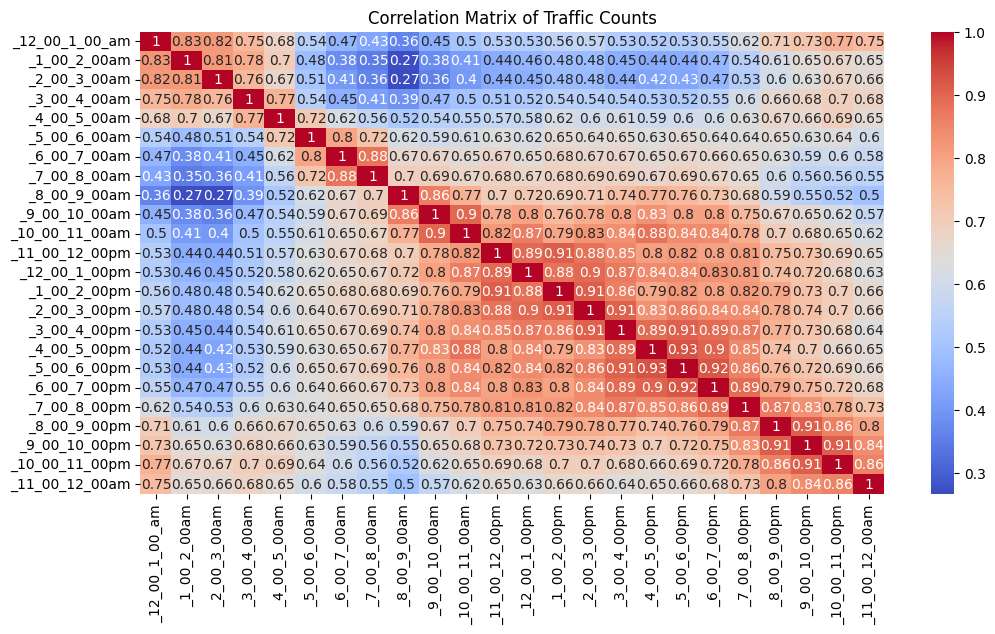

In [ ]:
# Step 3: Correlation analysis
plt.figure(figsize=(12, 6))
sns.heatmap(sensor_data[numeric_colmns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Traffic Counts')
plt.show()

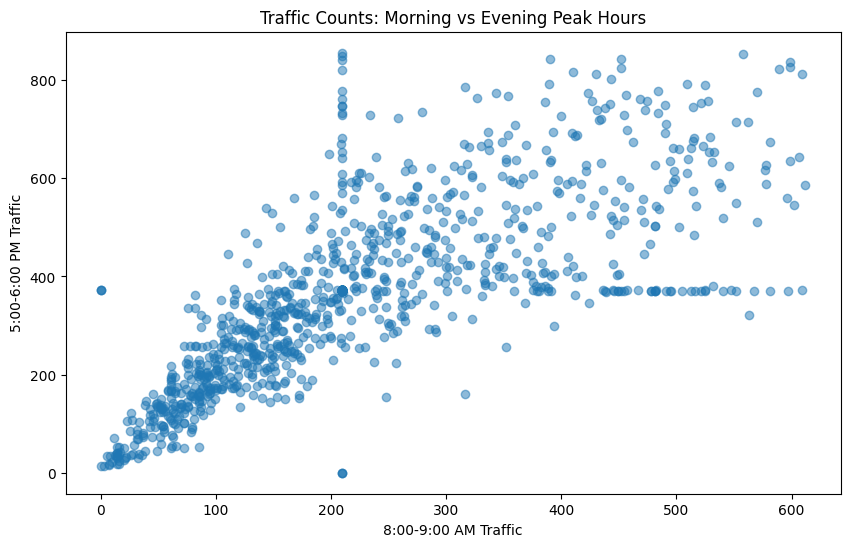

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(sensor_data['_8_00_9_00am'], sensor_data['_5_00_6_00pm'], alpha=0.5)
plt.title('Traffic Counts: Morning vs Evening Peak Hours')
plt.xlabel('8:00-9:00 AM Traffic')
plt.ylabel('5:00-6:00 PM Traffic')
plt.show()

In [ ]:
# Extract day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
sensor_data['day_of_week'] = sensor_data.index.dayofweek

# Extract the month (1=January, 2=February, ..., 12=December)
sensor_data['month'] = sensor_data.index.month
sensor_data['year']=sensor_data.index.year

In [ ]:
sensor_data.head()

,id,segmentid,roadway_name,from,to,direction,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,_3_00_4_00am,...,_5_00_6_00pm,_6_00_7_00pm,_7_00_8_00pm,_8_00_9_00pm,_9_00_10_00pm,_10_00_11_00pm,_11_00_12_00am,day_of_week,month,year
date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,EB,19.0,33.0,30.0,7.0,...,123.0,133.0,119.0,80.0,56.0,40.0,29.0,5,10,2020
2020-10-03,100,8152,BRIELLE AVENUE,Suffolk Avenue,Livingston Avenue,WB,29.0,9.0,10.0,12.0,...,121.0,92.0,80.0,63.0,39.0,57.0,30.0,5,10,2020
2020-10-03,102,147673,BROADWAY,Van Cortlandt Park South,West 242nd Street,SB,120.0,102.0,56.0,56.0,...,413.0,426.0,347.0,268.0,211.0,199.0,166.0,5,10,2020
2020-10-03,102,255653,BROADWAY,Broadway/ 7 Avenue Line,Broadway/ 7 Avenue Line,SB,48.0,50.0,28.0,20.0,...,127.0,140.0,103.0,97.0,80.0,69.0,64.0,5,10,2020
2020-10-03,102,158447,BROADWAY,West 242nd Street,Van Cortlandt Park South,NB,189.0,69.0,100.0,74.0,...,604.0,551.0,485.0,442.0,342.0,293.0,269.0,5,10,2020


In [ ]:
#checking the unique years
sensor_data['year'].unique()

array([2020], dtype=int32)

In [ ]:
#unique month
sensor_data['month'].unique()

array([10], dtype=int32)

In [ ]:
sensor_data.isna().sum()

,0
id,0
segmentid,0
roadway_name,0
from,0
to,0
direction,0
_12_00_1_00_am,0
_1_00_2_00am,0
_2_00_3_00am,0
_3_00_4_00am,0


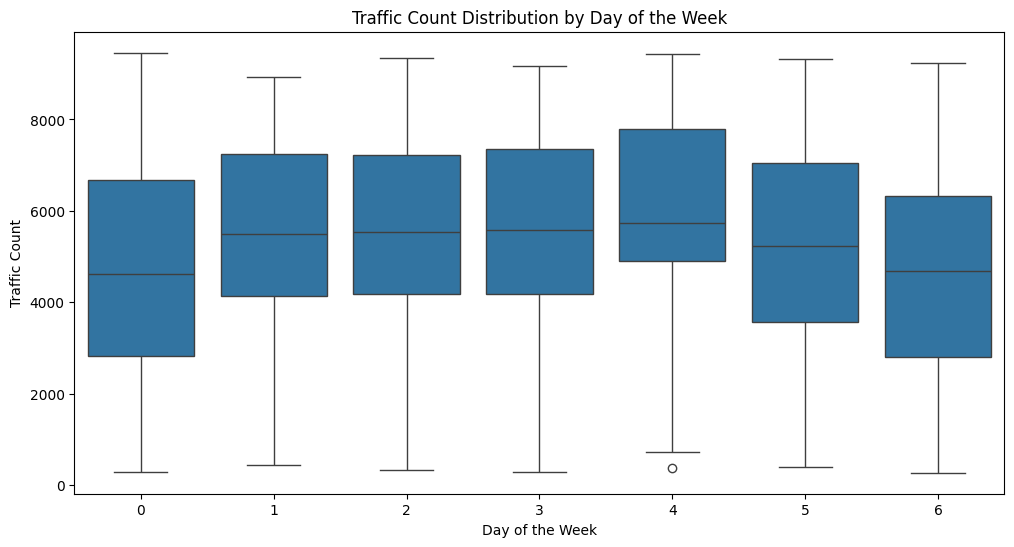

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y=sensor_data[numeric_colmns].sum(axis=1), data=sensor_data)
plt.title('Traffic Count Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Count')
plt.show()

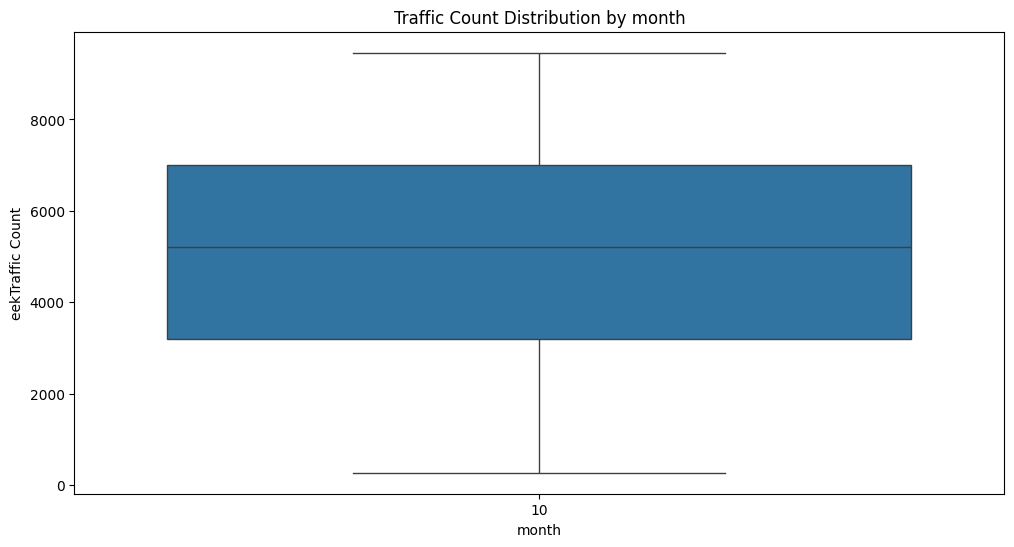

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y=sensor_data[numeric_colmns].sum(axis=1), data=sensor_data)
plt.title('Traffic Count Distribution by month')
plt.xlabel('month')
plt.ylabel('eekTraffic Count')
plt.show()

##**Moddelling**


#**Random Forest**


In [ ]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#One hot encoding
#convertiong 'to,from and direction to variable usabele in the model
october_data = pd.get_dummies(sensor_data, columns=['to', 'from','direction'], drop_first=True)


In [ ]:
october_data.head()

,id,segmentid,roadway_name,_12_00_1_00_am,_1_00_2_00am,_2_00_3_00am,_3_00_4_00am,_4_00_5_00am,_5_00_6_00am,_6_00_7_00am,...,from_West 260th Street,from_West 45th Street,from_West 46th Street,from_West Mosholu Parkway North,from_Woodlawn Cemetery Boundary,from_Worth Street,from_Yates Avenue,direction_NB,direction_SB,direction_WB
date,,,,,,,,,,,,,,,,,,,,,
2020-10-03,100,8152,BRIELLE AVENUE,19.0,33.0,30.0,7.0,12.0,23.0,29.0,...,False,False,False,False,False,False,False,False,False,False
2020-10-03,100,8152,BRIELLE AVENUE,29.0,9.0,10.0,12.0,12.0,12.0,17.0,...,False,False,False,False,False,False,False,False,False,True
2020-10-03,102,147673,BROADWAY,120.0,102.0,56.0,56.0,45.0,61.0,112.0,...,False,False,False,False,False,False,False,False,True,False
2020-10-03,102,255653,BROADWAY,48.0,50.0,28.0,20.0,25.0,40.0,54.0,...,False,False,False,False,False,False,False,False,True,False
2020-10-03,102,158447,BROADWAY,189.0,69.0,100.0,74.0,66.0,91.0,149.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
october_data.shape

(1000, 299)

In [ ]:
#  Use past traffic counts and day of the week as features
october_data['previous_hour'] = october_data['_12_00_1_00_am'].shift(1)
october_data.dropna(inplace=True)

# Split data into train and test
train_size = int(len(october_data) * 0.8)
train, test = october_data.iloc[:train_size], october_data.iloc[train_size:]

X_train_rf = train[['previous_hour', 'day_of_week'] + [col for col in train.columns if 'from_' in col or 'direction_' in col]]
y_train_rf = train['_12_00_1_00_am']

X_test_rf = test[['previous_hour', 'day_of_week'] + [col for col in test.columns if 'from_' in col or 'direction_' in col]]
y_test_rf = test['_12_00_1_00_am']


#Model Training

In [ ]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=300,random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluation
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 49.37288864889677


#**Random Forest Evaluation**


In [ ]:
# Evaluation
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest RMSE: 49.37288864889677
Random Forest MAE: 34.726044270833334
Random Forest R-squared: 0.3055805669782167


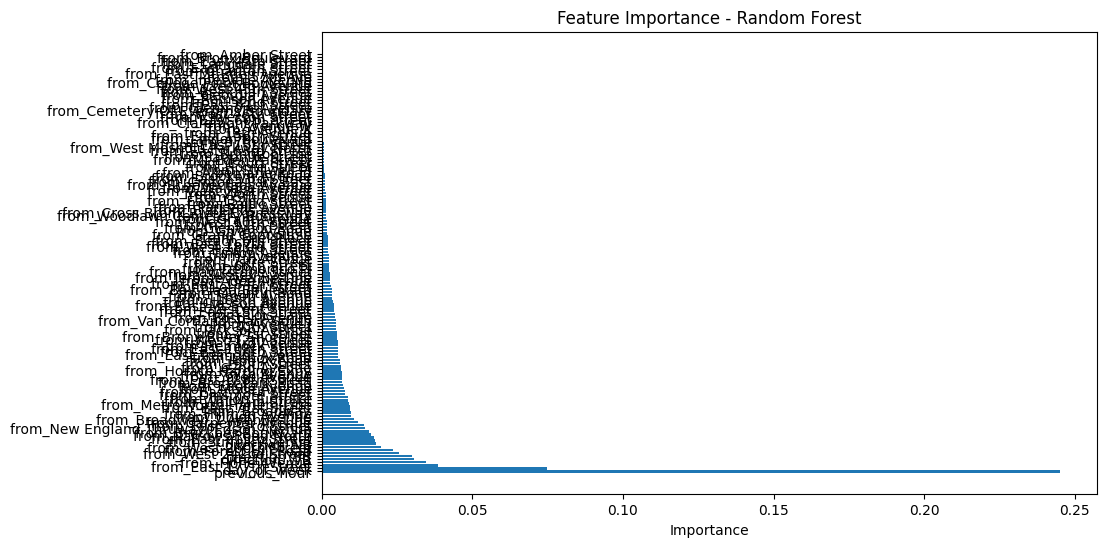

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
features = X_train_rf.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


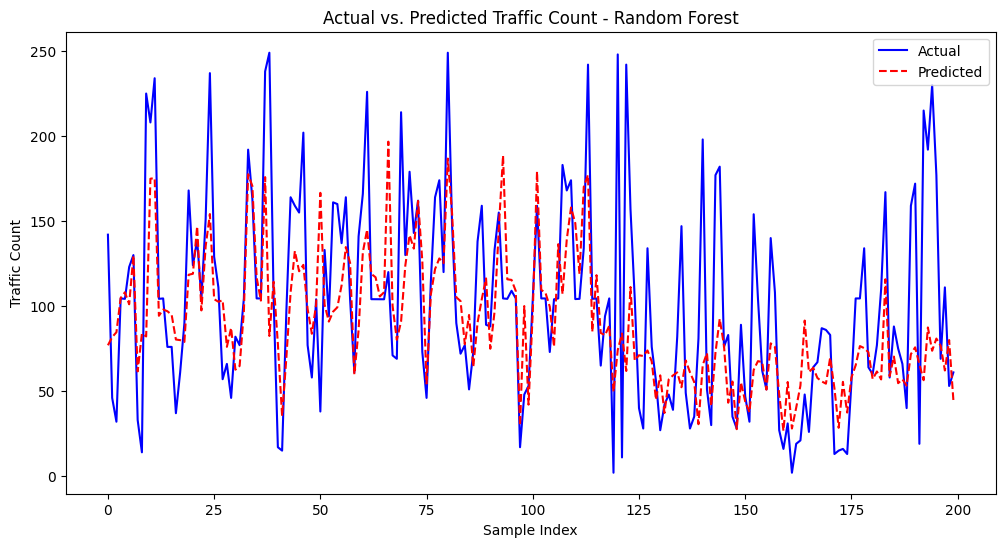

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rf.values, label='Actual', color='blue')
plt.plot(y_pred_rf, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.title('Actual vs. Predicted Traffic Count - Random Forest')
plt.legend()
plt.show()

#**LSTM model**


In [ ]:
#importing the necessary library
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
#modelling
# Select relevant columns for LSTM, including the encoded 'to', 'from', and 'direction' variables
lstm_features = october_data[['_12_00_1_00_am'] + [col for col in october_data.columns if 'from_' in col or 'direction_' in col]].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
lstm_features_scaled = scaler.fit_transform(lstm_features)

# Prepare data for LSTM (e.g., using the past 24 hours to predict the next hour)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predict the traffic count (first column)
    return np.array(X), np.array(y)

seq_length = 24  # Use the past 24 hours
X_lstm, y_lstm = create_sequences(lstm_features_scaled, seq_length)

# Split into train and test sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Predictions
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(np.hstack((y_pred_lstm, np.zeros((y_pred_lstm.shape[0], lstm_features.shape[1] - 1)))))[:, 0]  # Inverse transform only the traffic count

# Evaluation
rmse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm, squared=False)
print(f'LSTM RMSE: {rmse_lstm}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0827 - val_loss: 0.0520
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0453 - val_loss: 0.0500
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - val_loss: 0.0492
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0373 - val_loss: 0.0497
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0369 - val_loss: 0.0475
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0355 - val_loss: 0.0466
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0346 - val_loss: 0.0454
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0294 - val_loss: 0.0447
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0281 - val_loss: 0.0461
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0292 - val_loss: 0.0450
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0276 - val_loss: 0.0450
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0

#**Evaluation of the LSTM**

In [ ]:
# Evaluation
rmse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm, squared=False)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM MAE: {mae_lstm}')
print(f'LSTM R-squared: {r2_lstm}')

LSTM RMSE: 122.18686685655516
LSTM MAE: 112.1851386165594
LSTM R-squared: -260735.8642210561


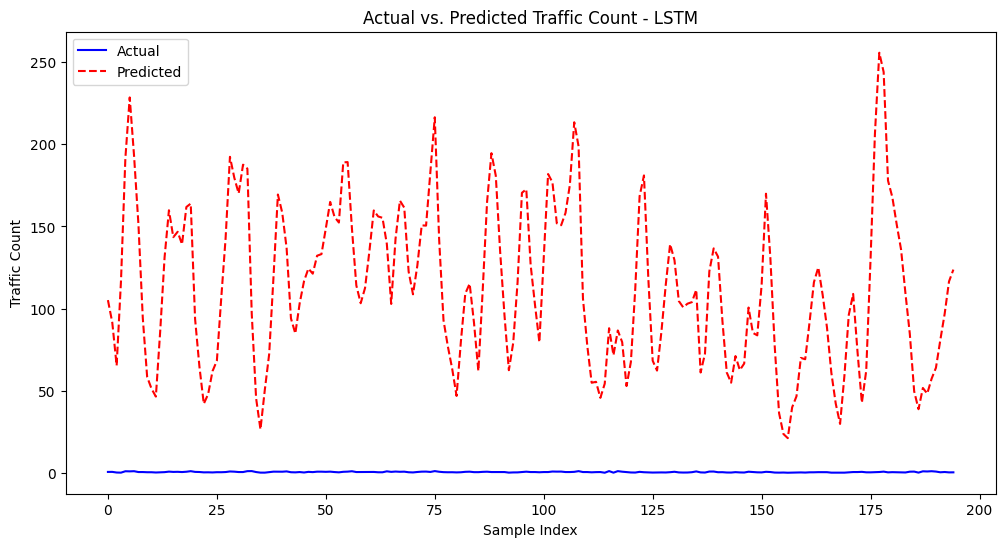

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_lstm, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.title('Actual vs. Predicted Traffic Count - LSTM')
plt.legend()
plt.show()

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0198 - val_loss: 0.0474
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0217 - val_loss: 0.0470
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0199 - val_loss: 0.0465
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0176 - val_loss: 0.0448
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0185 - val_loss: 0.0483
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0174 - val_loss: 0.0482
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0191 - val_loss: 0.0470
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0177 - val_loss: 0.0464
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - val_loss: 0.0471
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0161 - val_loss: 0.0495
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0163 - val_loss: 0.0475
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

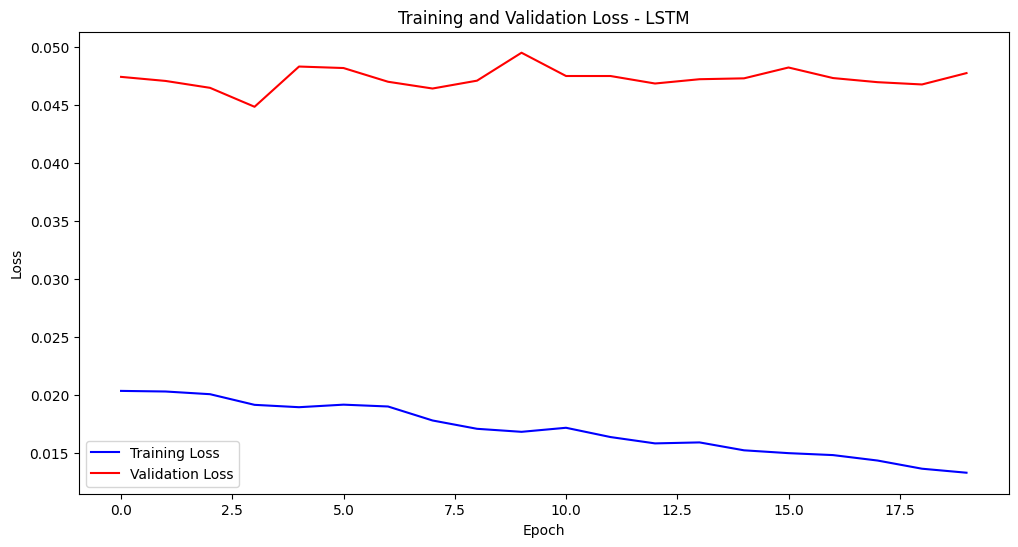

In [ ]:
# Train the model and store the history
history = model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Now you can access the loss history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - LSTM')
plt.legend()
plt.show()

#**Linear Regression**

In [ ]:
#import the libraries
from sklearn.linear_model import LinearRegression


In [ ]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_lr = lr_model.predict(X_test_rf)

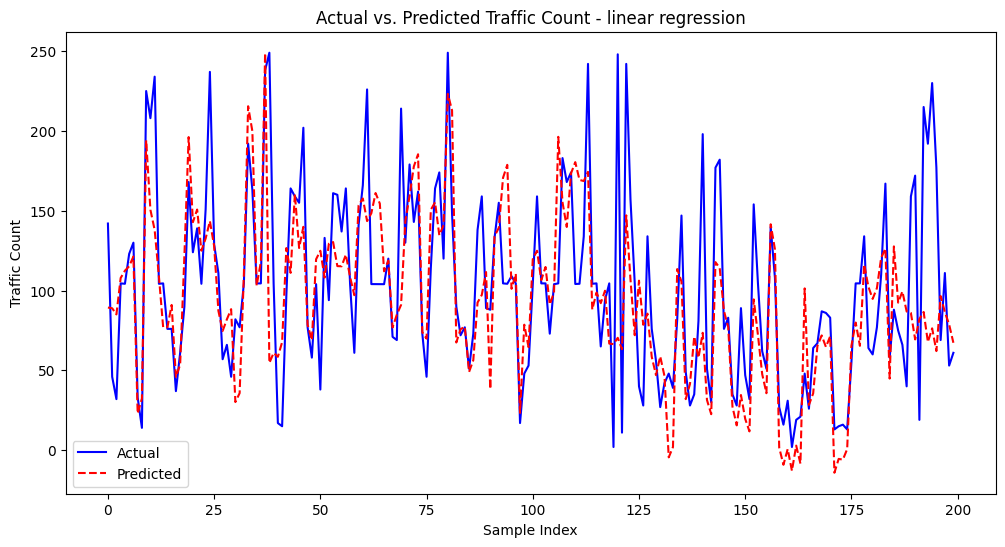

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rf.values, label='Actual', color='blue')
plt.plot(y_pred_lr, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.title('Actual vs. Predicted Traffic Count - linear regression')
plt.legend()
plt.show()

#**Evaluation of linear regression**

In [ ]:
# Evaluation
rmse_lr = mean_squared_error(y_test_rf, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test_rf, y_pred_lr)
r2_lr = r2_score(y_test_rf, y_pred_lr)

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

Linear Regression RMSE: 46.02181658752166
Linear Regression MAE: 33.30999060738307
Linear Regression R-squared: 0.3966458473428025


#**Gradient Boosting (GBR)**

In [ ]:
#import the libraries
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_gbr = gbr_model.predict(X_test_rf)

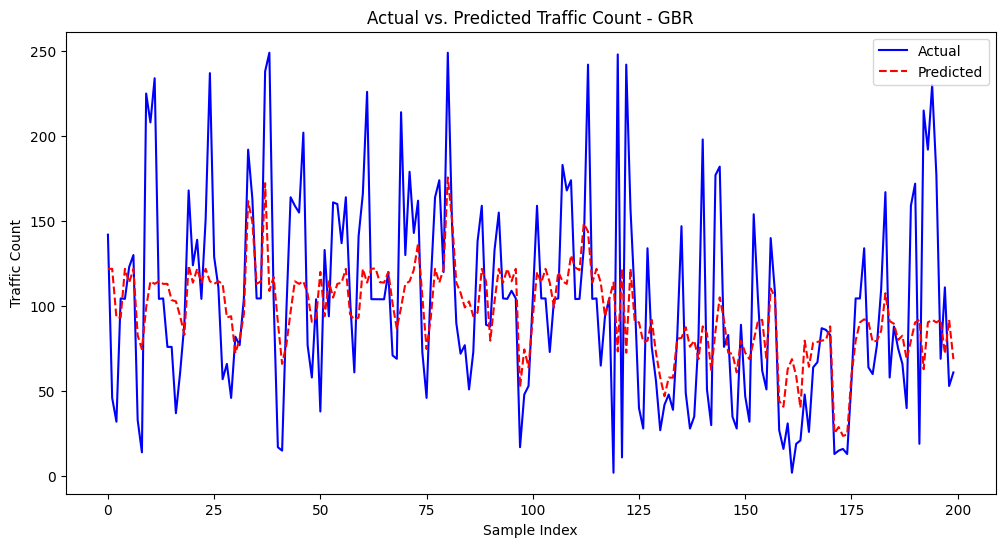

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rf.values, label='Actual', color='blue')
plt.plot(y_pred_gbr, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.title('Actual vs. Predicted Traffic Count - GBR')
plt.legend()
plt.show()

#**Evaluation Of the GBR**

In [ ]:
# Evaluation
rmse_gbr = mean_squared_error(y_test_rf, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test_rf, y_pred_gbr)
r2_gbr = r2_score(y_test_rf, y_pred_gbr)

print(f'GBR RMSE: {rmse_gbr}')
print(f'GBR MAE: {mae_gbr}')
print(f'GBR R-squared: {r2_gbr}')

GBR RMSE: 50.01038468329533
GBR MAE: 36.881911912766654
GBR R-squared: 0.28753229712076644


#**Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Train SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_svm = svm_model.predict(X_test_rf)


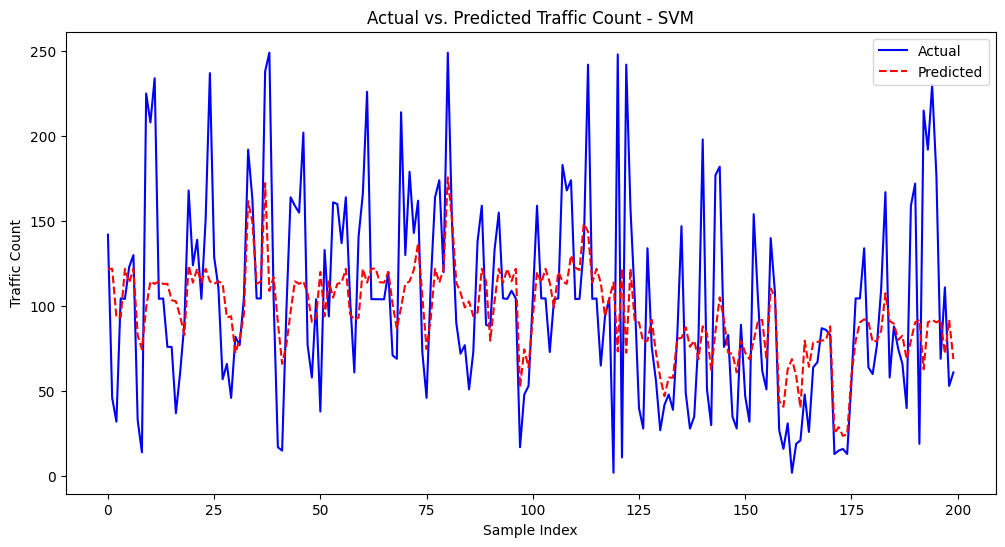

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rf.values, label='Actual', color='blue')
plt.plot(y_pred_gbr, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.title('Actual vs. Predicted Traffic Count - SVM')
plt.legend()
plt.show()

#**Evaluation of Support Vector Machine

In [ ]:
# Evaluation
rmse_svm = mean_squared_error(y_test_rf, y_pred_svm, squared=False)
mae_svm = mean_absolute_error(y_test_rf, y_pred_svm)
r2_svm = r2_score(y_test_rf, y_pred_svm)

print(f'SVM RMSE: {rmse_svm}')
print(f'SVM MAE: {mae_svm}')
print(f'SVM R-squared: {r2_svm}')

SVM RMSE: 56.68560189155272
SVM MAE: 43.42851784923057
SVM R-squared: 0.08464340199088127


#**Implementation**

#**Integration of AI and ML Algorithms**


In [ ]:

# Simulate input data for Random Fore
simulated_rf_input = np.random.rand(1, X_train_rf.shape[1])  # Adjusting the shape to match Random Forest input

# Define the AVSystem class using only Random Forest
class AVSystem:
    def __init__(self, random_forest_model):
        self.rf_model = random_forest_model

    def predict_traffic(self, rf_input_data):
        # Predict using Random Forest
        rf_prediction = self.rf_model.predict(rf_input_data)
        return rf_prediction

    def adjust_route(self, traffic_prediction):
        # Use traffic_prediction to adjust the route
        pass

# Initialize the AV system
av_system = AVSystem(rf_model)

# Predict traffic using simulated input data
prediction = av_system.predict_traffic(simulated_rf_input)

# Adjust route based on the prediction
av_system.adjust_route(prediction)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(prediction)

[114.76229167]


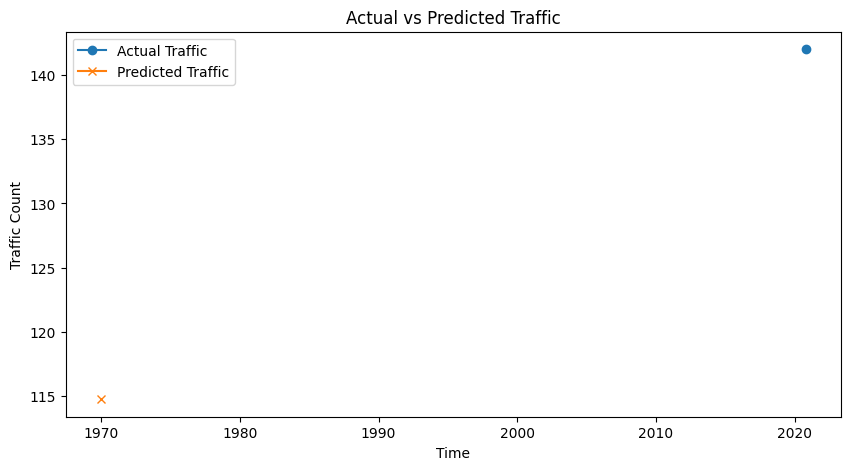

In [ ]:
# You can simulate a scenario where you compare actual vs predicted
actual_values = y_test_rf[:len(prediction)]  # Adjust length to match prediction

plt.figure(figsize=(10, 5))
plt.plot(actual_values, label="Actual Traffic", marker='o')
plt.plot(prediction, label="Predicted Traffic", marker='x')
plt.title("Actual vs Predicted Traffic")
plt.xlabel("Time")
plt.ylabel("Traffic Count")
plt.legend()
plt.show()

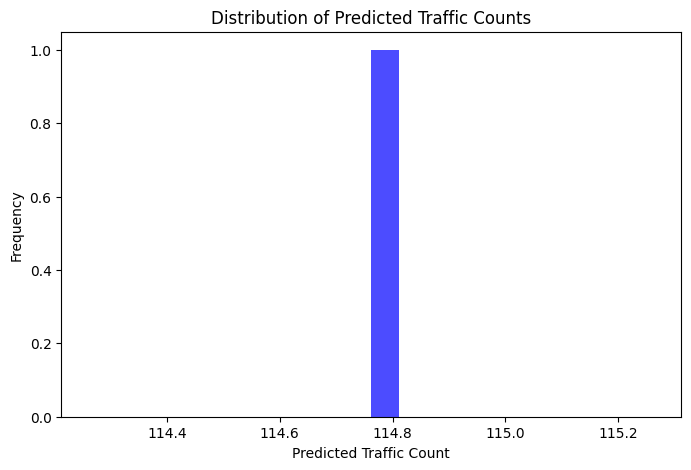

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(prediction, bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Predicted Traffic Counts")
plt.xlabel("Predicted Traffic Count")
plt.ylabel("Frequency")
plt.show()

#**Route Optimization Technique**

In [ ]:
# Example current and new routes (simplified)
current_route = ["Segment_A", "Segment_B", "Segment_C"]
new_route = ["Segment_X", "Segment_Y", "Segment_Z"]

# Threshold for traffic prediction (this could be a specific traffic count above which you want to change routes)
threshold = 50

# Simplified example of route optimization using predicted traffic data
def optimize_route(traffic_prediction, current_route):
    # Adjust the route based on traffic prediction
    if traffic_prediction > threshold:
        # Change route to avoid congestion
        return new_route
    return current_route

# Use the predicted traffic data to optimize the route
optimized_route = optimize_route(prediction[0], current_route)

print(f"Optimized Route: {optimized_route}")

Optimized Route: ['Segment_X', 'Segment_Y', 'Segment_Z']


In [ ]:
#**case Study**

#**Case Study**


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature n

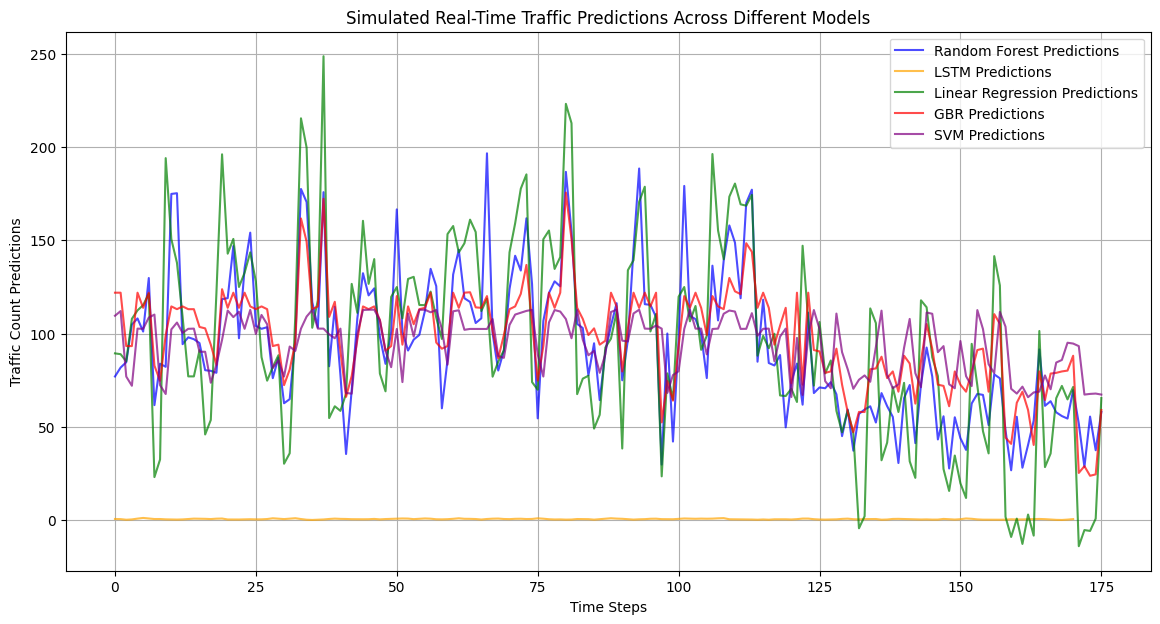

In [ ]:
# Simulate real-time data prediction for any model
def simulate_real_time_prediction(model, data, window_size=24):
    predictions = []
    for i in range(window_size, len(data)):
        input_data = data[i-window_size:i]
        if isinstance(input_data, pd.DataFrame):
            input_data = input_data.values
        prediction = model.predict(input_data)
        predictions.append(prediction[0])  # Assuming the output is an array, take the first element
    return np.array(predictions)

# Set the window size
window_size = 24

# Simulate predictions using the Random Forest model
rf_predictions = simulate_real_time_prediction(rf_model, X_test_rf, window_size)

# Simulate predictions using the LSTM model
lstm_predictions = simulate_real_time_prediction(model, X_test_lstm, window_size)

# Simulate predictions using the Linear Regression model
lr_predictions = simulate_real_time_prediction(lr_model, X_test_rf, window_size)

# Simulate predictions using the Gradient Boosting Regressor (GBR) model
gbr_predictions = simulate_real_time_prediction(gbr_model, X_test_rf, window_size)

# Simulate predictions using the Support Vector Machine (SVM) model
svm_predictions = simulate_real_time_prediction(svm_model, X_test_rf, window_size)

# Visualization of predictions for all models
plt.figure(figsize=(14, 7))
plt.plot(rf_predictions, label='Random Forest Predictions', color='blue', alpha=0.7)
plt.plot(lstm_predictions, label='LSTM Predictions', color='orange', alpha=0.7)
plt.plot(lr_predictions, label='Linear Regression Predictions', color='green', alpha=0.7)
plt.plot(gbr_predictions, label='GBR Predictions', color='red', alpha=0.7)
plt.plot(svm_predictions, label='SVM Predictions', color='purple', alpha=0.7)

plt.title('Simulated Real-Time Traffic Predictions Across Different Models')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Count Predictions')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


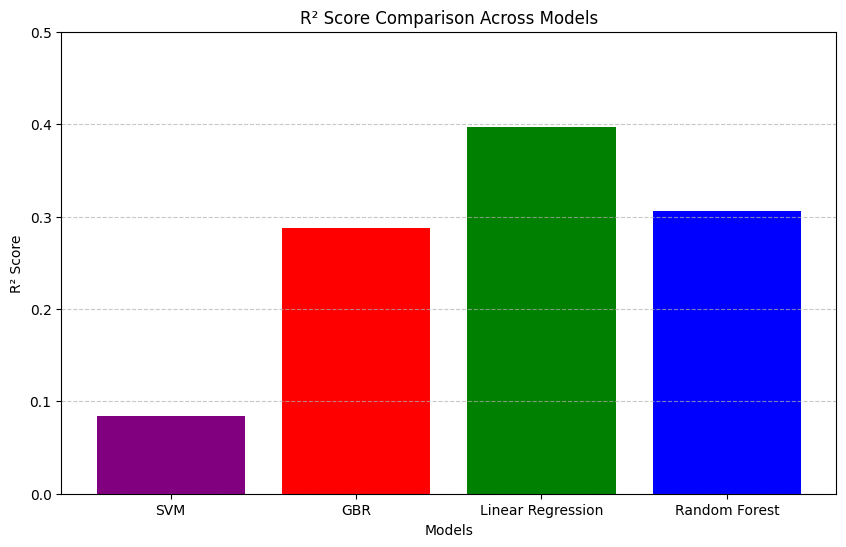

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'GBR', 'Linear Regression', 'Random Forest']

# R² scores for each model
r2_scores = [
    0.08464340199088127,  # SVM R² score
    0.28753229712076644,  # GBR R² score
    0.3966458473428025,   # Linear Regression R² score
    0.3055805669782167    # Random Forest R² score
]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['purple', 'red', 'green', 'blue'])
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score Comparison Across Models')
plt.ylim([0, 0.5])  # Adjust the y-axis range to better visualize the differences
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.show()
